<a href="https://colab.research.google.com/github/dhesaardhi/Image-Classification-with-CNN/blob/main/Image_Clasification_Proyek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**

In [ ]:
import tensorflow as tf
import zipfile,os

2.12.0


**IMPORT DATA**

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2023-09-05 06:39:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2023-09-05 06:39:45 ERROR 404: The specified resource does not exist..



**Ekstrasi File Zip**

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

**Cek Direktory**

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

**Data Pre-Processing dengan Segmentasi Gambar**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)

**Pembagian Data untuk Data Training dan Data Validation**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Bangun Arsitektur CNN**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 98, 148, 16)       448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 49, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 47, 72, 32)        4640      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 23, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 21, 34, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 10, 17, 64)      

**Compile model dengan menggunakan 'adam' dan optimizer loss function 'categorical_crossentropy' karena target menggunakan data categorial**

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

**Function Callback** untuk menampilkan angka tertinggi dari hasil akurasi

**Training Pemodelan**

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
)

Epoch 1/20
25/25 - 23s - loss: 0.0100 - accuracy: 0.9961 - val_loss: 0.0308 - val_accuracy: 0.9812 - 23s/epoch - 914ms/step
Epoch 2/20
25/25 - 20s - loss: 0.0194 - accuracy: 0.9961 - val_loss: 0.0160 - val_accuracy: 0.9937 - 20s/epoch - 812ms/step
Epoch 3/20
25/25 - 18s - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.0203 - val_accuracy: 0.9937 - 18s/epoch - 726ms/step
Epoch 4/20
25/25 - 19s - loss: 0.0180 - accuracy: 0.9935 - val_loss: 0.0985 - val_accuracy: 0.9688 - 19s/epoch - 775ms/step
Epoch 5/20
25/25 - 18s - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0482 - val_accuracy: 0.9812 - 18s/epoch - 735ms/step
Epoch 6/20
25/25 - 20s - loss: 0.0125 - accuracy: 0.9987 - val_loss: 0.1447 - val_accuracy: 0.9812 - 20s/epoch - 797ms/step
Epoch 7/20
25/25 - 19s - loss: 0.0126 - accuracy: 0.9975 - val_loss: 0.0372 - val_accuracy: 0.9937 - 19s/epoch - 746ms/step
Epoch 8/20
25/25 - 19s - loss: 0.0242 - accuracy: 0.9909 - val_loss: 0.2126 - val_accuracy: 0.9750 - 19s/epoch - 755ms/step
Epoch 9/

Akurasi tertinggi sebesar **99.87%** yang terjadi pada epoch ke 16

**Uji Data Tunggal**

Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ (7).png
1/1 [==============================] - 0s 29ms/step
04l5I8TqdzF9WDMJ (7).png
Hasil Klasifikasi adalah KERTAS


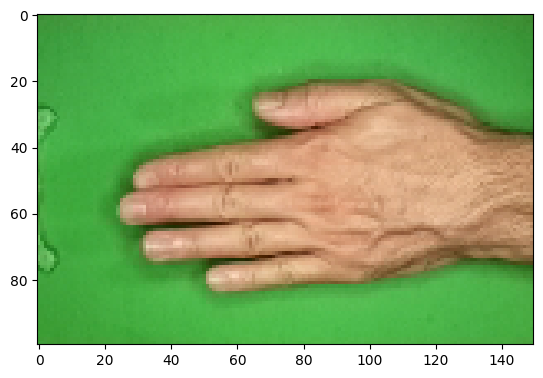

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

upload_data = files.upload()

for fn in upload_data.keys():

  # predicting images
  path = fn
  img_input = image.load_img(path, target_size=(100,150))

  imgplot = plt.imshow(img_input)
  transpose_image = image.img_to_array(img_input)
  transpose_image = np.expand_dims(transpose_image, axis=0)
  images = np.vstack([transpose_image])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0, 0] == 1:
    print('Hasil Klasifikasi adalah KERTAS')
  elif classes[0, 1] == 1:
    print('Hasil Klasifikasi adalah BATU')
  elif classes[0, 2] == 1:
    print('Hasil Klasifikasi adalah GUNTING')